<a href="https://colab.research.google.com/github/Satinder83/AI_ML/blob/master/Cartoon_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shutil
#shutil.unpack_archive("cartoonset100k.tgz", "/tmp/")
import time

In [2]:
import tarfile
import shutil
import matplotlib.pyplot as plt


In [3]:
!gsutil cp gs://cartoonset_public_files/cartoonset100k.tgz .  #imports data to google colab, appx 10gb

Copying gs://cartoonset_public_files/cartoonset100k.tgz...
\ [1 files][  4.4 GiB/  4.4 GiB]   53.7 MiB/s                                   
Operation completed over 1 objects/4.4 GiB.                                      


In [4]:
with tarfile.open('cartoonset100k.tgz', 'r:gz') as tar:
    tar.extractall()

In [5]:
import os
import shutil
import numpy as np
import pandas as pd

In [6]:
data_dir = os.path.join('./cartoonset100k')

In [7]:
os.listdir(data_dir)

['3', '1', '0', '9', '6', '2', '8', '5', '7', '4']

In [8]:
sub_dir = os.path.join(data_dir, np.random.choice(os.listdir(data_dir)))
print(sub_dir)
os.listdir(sub_dir)[0:10]

./cartoonset100k/2


['cs1476637841348168427.png',
 'cs14918243992695175288.csv',
 'cs14517907749496441879.csv',
 'cs15101540582737940218.png',
 'cs145835479326306664.png',
 'cs1599194478536602930.png',
 'cs15454381582899371754.csv',
 'cs15350788407348318260.csv',
 'cs1548287571936625777.png',
 'cs15058442205935633753.png']

In [9]:
np.random.seed(42)

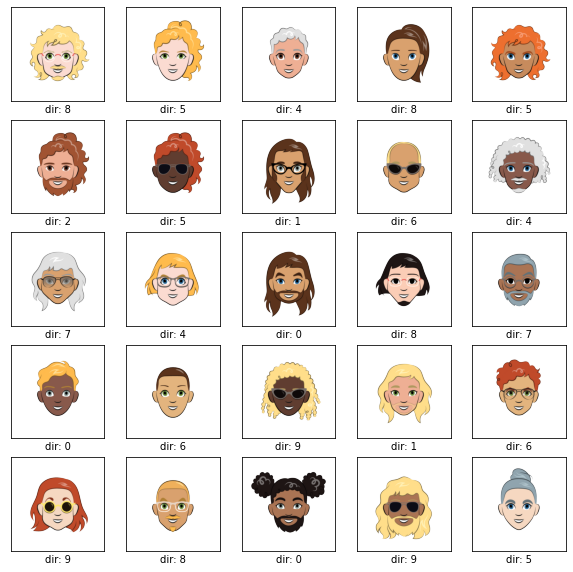

In [10]:
plt.figure(figsize=(10,10)) #plotting some random images, random by folder

for i in range(25):
    sub_dir_name = np.random.choice(os.listdir(data_dir))
    sub_dir = os.path.join(data_dir, sub_dir_name)
    img_file = os.path.join(sub_dir, np.random.choice([x for x in os.listdir(sub_dir) if x.endswith('.png')]))
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = plt.imread(img_file)
    plt.imshow(img)
    plt.xlabel(f'dir: {sub_dir_name}')
    
plt.show()

In [11]:
os.mkdir('cartoonset_by_features') #dict to separate out images by features

In [12]:

cache_directory= os.path.join('./','cartoonset_by_features')
print(cache_directory)

./cartoonset_by_features


In [13]:

def copy_images_to_labels_folder(img_files, label_files, feature_name, cache_directory, label_idx_dict, reset_images=False, reuse_images=False):
  
    if not os.path.exists(cache_directory):
        raise Exception(f'{cache_directory} does not exist')
    feature_dir = os.path.join(cache_directory, feature_name)
    
    if os.path.exists(feature_dir):
        if reset_images:
            print(f'{feature_dir} does not exist, creating ... ')
            shutil.rmtree(feature_dir)
            os.mkdir(feature_dir)
        else:
            if reuse_images:
                #nothing to do 
                return feature_dir
            else:
                raise Exception(f'Invalid Arguments, {feature_dir} already exists, set reset_images to True to reset for {feature_name}')
    else:
        print(f'{feature_dir} does not exist, creating ... ')
        os.mkdir(feature_dir)
     
    feature_idx = label_idx_dict.get(feature_name, None)

      
    for img_file, label_file in list(zip(img_files, label_files)):
        label = pd.read_csv(label_file, header=None).loc[feature_idx][1]
        label_dir = os.path.join(feature_dir, str(label))
        if not os.path.exists(label_dir):
            print(f'{label_dir} does not exist, creating ... ')
            os.mkdir(label_dir)
        try:
            shutil.copy(img_file, label_dir)
            
        except:
            pass
    return feature_dir

In [14]:
#pd.read_csv(file[0], header=None).loc[12][1]

In [15]:
# # 'cs14517540748515822106.csv' in label_files

# file = [x for x in all_file_paths if x.endswith('cs14517540748515822106.csv')]
# file

In [16]:
# for img_file, label_file in zip(img_files, label_files):
#     print(img_file, label_file)

In [17]:
def get_feature_idx_dicts(label_file):
    """
    Reads one description file and creates dicts to look up the features
    returns:
        idx_label_dict: a dictionary mapping index of descriptor to the name
        label_idx_dict: a dictionary mapping feature name to the index 
    """
    idx_label_dict = pd.read_csv(label_file, header=None)[0].to_dict()
    label_idx_dict = {v:k for k, v in idx_label_dict.items()}
    return idx_label_dict, label_idx_dict

In [18]:
# in the cached location where files are arranged in subfolders according the class read all the filenames along with path
for root, dirs, fnames_ in os.walk(data_dir):
    all_file_paths = [os.path.join(root, fname) for fname in fnames_]
img_files = [x for x in all_file_paths if x.endswith('.png')]
label_files = [x for x in all_file_paths if x.endswith('.csv')]

img_files.sort()
label_files.sort()

In [19]:
idx_label_dict, label_idx_dict = get_feature_idx_dicts(label_files[0])

In [20]:
img_files[:5]

['./cartoonset100k/4/cs17535514917847201886.png',
 './cartoonset100k/4/cs17535703226190550414.png',
 './cartoonset100k/4/cs17535964194196479338.png',
 './cartoonset100k/4/cs17536008159131496090.png',
 './cartoonset100k/4/cs17536429323054231391.png']

In [21]:
label_files[:5]

['./cartoonset100k/4/cs17535514917847201886.csv',
 './cartoonset100k/4/cs17535703226190550414.csv',
 './cartoonset100k/4/cs17535964194196479338.csv',
 './cartoonset100k/4/cs17536008159131496090.csv',
 './cartoonset100k/4/cs17536429323054231391.csv']

In [22]:
#shutil.rmtree('./cartoonset_by_features/hair_color')

In [23]:
for feature_name in label_idx_dict:
    print(feature_name)
    training_dir = copy_images_to_labels_folder(img_files, label_files, feature_name, cache_directory, label_idx_dict, reuse_images=True)
    
    print(f'Created training dir: {training_dir}')

eye_angle
./cartoonset_by_features/eye_angle does not exist, creating ... 
./cartoonset_by_features/eye_angle/1 does not exist, creating ... 
./cartoonset_by_features/eye_angle/2 does not exist, creating ... 
./cartoonset_by_features/eye_angle/0 does not exist, creating ... 
Created training dir: ./cartoonset_by_features/eye_angle
eye_lashes
./cartoonset_by_features/eye_lashes does not exist, creating ... 
./cartoonset_by_features/eye_lashes/1 does not exist, creating ... 
./cartoonset_by_features/eye_lashes/0 does not exist, creating ... 
Created training dir: ./cartoonset_by_features/eye_lashes
eye_lid
./cartoonset_by_features/eye_lid does not exist, creating ... 
./cartoonset_by_features/eye_lid/0 does not exist, creating ... 
./cartoonset_by_features/eye_lid/1 does not exist, creating ... 
Created training dir: ./cartoonset_by_features/eye_lid
chin_length
./cartoonset_by_features/chin_length does not exist, creating ... 
./cartoonset_by_features/chin_length/2 does not exist, creati

In [24]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.inception_resnet_v2 import decode_predictions
import tensorflow as tf
from tensorflow import keras
import datetime
from sklearn.metrics import accuracy_score

In [25]:
tf.keras.backend.clear_session()

In [ ]:
base_model = InceptionResNetV2(weights= 'imagenet', include_top= False)

219062272/219055592 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = os.path.join(cache_directory, 'hair_color'),
    labels = 'inferred', 
    label_mode = 'categorical',
    #label_mode = 'int',
    class_names= None,
    image_size= (299, 299), 
    shuffle= True,
    seed = 42,
    validation_split = 0.2,
    subset= 'training',
    batch_size = 128,
        )

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = os.path.join(cache_directory, 'hair_color'),
    labels = 'inferred',
    label_mode = 'categorical',
    #label_mode = 'int',
    class_names= None,
    image_size= (299, 299), 
    shuffle= True,
    seed = 42,
    validation_split = 0.2,
    subset= 'validation',
    batch_size= 128,
      
)
          
                                      

In [ ]:
#os.path.join(cache_directory, 'face_color')

In [ ]:
num_classes = len(os.listdir(os.path.join(cache_directory, 'hair_color')))
num_classes

10

In [26]:
os.mkdir('model_history')

In [27]:
model_history_dir = os.path.join('./', 'model_history')

In [28]:
validation_metrics = {'accuracies': [], 'total_classes': [], 'feature_names': []}


In [29]:
tf.keras.backend.clear_session()

In [ ]:
for feature_name in label_idx_dict:
    start_time = time.time()
    print('\n\nBuilding Model for Feature: ', feature_name)

    training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = os.path.join(cache_directory, feature_name),
    labels = 'inferred', 
    label_mode = 'categorical',
    #label_mode = 'int',
    class_names= None,
    image_size= (299, 299), 
    shuffle= True,
    seed = 42,
    validation_split = 0.2,
    subset= 'training',
    batch_size = 128,
        )

    valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory = os.path.join(cache_directory, feature_name),
        labels = 'inferred',
        label_mode = 'categorical',
        #label_mode = 'int',
        class_names= None,
        image_size= (299, 299), 
        shuffle= True,
        seed = 42,
        validation_split = 0.2,
        subset= 'validation',
        batch_size= 128,
        
    )

    num_classes = len(os.listdir(os.path.join(cache_directory, feature_name)))

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(256, 3, (2, 2), activation='relu', input_shape=(299, 299, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(256, 3, (2, 2), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(128, 3, (2, 2), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        # tf.keras.layers.Conv2D(128, 5, (2, 2), activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(64, 3, (2, 2), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

    
        tf.keras.layers.GlobalAveragePooling2D(),

        #keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation= 'relu'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(num_classes, activation='softmax')
        
    ])

    model.compile(optimizer=keras.optimizers.Nadam(learning_rate= 0.001),
              loss='categorical_crossentropy',  
               # loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics = ['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(patience=6)
    reduce_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(patience = 3)

    history= model.fit(training_dataset, epochs=100, validation_data= valid_dataset, callbacks= [early_stop, reduce_on_plateau])  
    
    #save model
    this_model_history = os.path.join(model_history_dir, feature_name)
    if not os.path.exists(this_model_history):
        os.mkdir(this_model_history)
    model_path = os.path.join(this_model_history, datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+feature_name+'.h5')

    model.save(model_path, overwrite = True)
    loaded_model = keras.models.load_model(model_path)
    print('\nCalculating and Printing, Validation Metrices\n')
    acc_score_sum = 0
    iterations = 0
    validation_metrics['feature_names'].append(feature_name)
    validation_metrics['accuracies'].append(loaded_model.evaluate(valid_dataset)[1]*100)

    total_classes = num_classes
    validation_metrics['total_classes'].append(total_classes)
    # for x, y in valid_dataset:
    #     acc_score_sum += accuracy_score(y, np.argmax(loaded_model.predict(x), axis=1))
    #     iterations+= 1
    #validation_metrics['accuracies'].append(acc_score_sum/iterations)
    print(validation_metrics)

    print(f'Total Execution time for {feature_name} seconds --',(time.time() - start_time))




Building Model for Feature:  eye_angle
Found 10000 files belonging to 3 classes.
Using 8000 files for training.
Found 10000 files belonging to 3 classes.
Using 2000 files for validation.
Epoch 1/100
63/63 [==============================] - 106s 1s/step - loss: 1.3155 - accuracy: 0.3831 - val_loss: 1.8405 - val_accuracy: 0.3255
Epoch 2/100
63/63 [==============================] - 86s 1s/step - loss: 0.5665 - accuracy: 0.7362 - val_loss: 0.8641 - val_accuracy: 0.5905
Epoch 3/100
63/63 [==============================] - 85s 1s/step - loss: 0.3217 - accuracy: 0.8400 - val_loss: 0.4567 - val_accuracy: 0.8080
Epoch 4/100
63/63 [==============================] - 84s 1s/step - loss: 0.2889 - accuracy: 0.8520 - val_loss: 0.3435 - val_accuracy: 0.8415
Epoch 5/100
63/63 [==============================] - 84s 1s/step - loss: 0.2665 - accuracy: 0.8514 - val_loss: 0.3057 - val_accuracy: 0.8345
Epoch 6/100
63/63 [==============================] - 84s 1s/step - loss: 0.2624 - accuracy: 0.8647 - val_

In [ ]:
loaded_model.evaluate(valid_dataset)[1]*100

16/16 [==============================] - 12s 439ms/step - loss: 2.6913 - accuracy: 0.3595


35.9499990940094

In [ ]:
name = 'Satty'

In [ ]:
 start_time = time.time()

print(f'Total Execution time for {name} seconds --', (time.time() - start_time))

Total Execution time for Sattu seconds -- 6.461143493652344e-05


In [40]:
list_labels = [i for i in label_idx_dict]
list_labels

['eye_angle',
 'eye_lashes',
 'eye_lid',
 'chin_length',
 'eyebrow_weight',
 'eyebrow_shape',
 'eyebrow_thickness',
 'face_shape',
 'facial_hair',
 'hair',
 'eye_color',
 'face_color',
 'hair_color',
 'glasses',
 'glasses_color',
 'eye_slant',
 'eyebrow_width',
 'eye_eyebrow_distance']

In [41]:
list_labels[list_labels.index('hair_color'):]

['hair_color',
 'glasses',
 'glasses_color',
 'eye_slant',
 'eyebrow_width',
 'eye_eyebrow_distance']

## Colab Times out and restarting from last feature i.e. hair_color

In [42]:
for feature_name in list_labels[list_labels.index('hair_color'):]:
    start_time = time.time()
    print('\n\nBuilding Model for Feature: ', feature_name)

    training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = os.path.join(cache_directory, feature_name),
    labels = 'inferred', 
    label_mode = 'categorical',
    #label_mode = 'int',
    class_names= None,
    image_size= (299, 299), 
    shuffle= True,
    seed = 42,
    validation_split = 0.2,
    subset= 'training',
    batch_size = 128,
        )

    valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory = os.path.join(cache_directory, feature_name),
        labels = 'inferred',
        label_mode = 'categorical',
        #label_mode = 'int',
        class_names= None,
        image_size= (299, 299), 
        shuffle= True,
        seed = 42,
        validation_split = 0.2,
        subset= 'validation',
        batch_size= 128,
        
    )

    num_classes = len(os.listdir(os.path.join(cache_directory, feature_name)))

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(256, 3, (2, 2), activation='relu', input_shape=(299, 299, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(256, 3, (2, 2), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(128, 3, (2, 2), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        # tf.keras.layers.Conv2D(128, 5, (2, 2), activation='relu'),
        # tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(64, 3, (2, 2), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

    
        tf.keras.layers.GlobalAveragePooling2D(),

        #keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation= 'relu'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Dense(num_classes, activation='softmax')
        
    ])

    model.compile(optimizer=keras.optimizers.Nadam(learning_rate= 0.001),
              loss='categorical_crossentropy',  
               # loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics = ['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(patience=6)
    reduce_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(patience = 3)

    history= model.fit(training_dataset, epochs=100, validation_data= valid_dataset, callbacks= [early_stop, reduce_on_plateau])  
    
    #save model
    this_model_history = os.path.join(model_history_dir, feature_name)
    if not os.path.exists(this_model_history):
        os.mkdir(this_model_history)
    model_path = os.path.join(this_model_history, datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+feature_name+'.h5')

    model.save(model_path, overwrite = True)
    loaded_model = keras.models.load_model(model_path)
    print('\nCalculating and Printing, Validation Metrices\n')
    acc_score_sum = 0
    iterations = 0
    validation_metrics['feature_names'].append(feature_name)
    validation_metrics['accuracies'].append(loaded_model.evaluate(valid_dataset)[1]*100)

    total_classes = num_classes
    validation_metrics['total_classes'].append(total_classes)
    # for x, y in valid_dataset:
    #     acc_score_sum += accuracy_score(y, np.argmax(loaded_model.predict(x), axis=1))
    #     iterations+= 1
    #validation_metrics['accuracies'].append(acc_score_sum/iterations)
    print(validation_metrics)

    print(f'Total Execution time for {feature_name} seconds --',(time.time() - start_time))




Building Model for Feature:  hair_color
Found 10000 files belonging to 10 classes.
Using 8000 files for training.
Found 10000 files belonging to 10 classes.
Using 2000 files for validation.
Epoch 1/100
63/63 [==============================] - 108s 1s/step - loss: 1.1109 - accuracy: 0.6469 - val_loss: 59.2317 - val_accuracy: 0.0925
Epoch 2/100
63/63 [==============================] - 87s 1s/step - loss: 0.1483 - accuracy: 0.9590 - val_loss: 28.8711 - val_accuracy: 0.1125
Epoch 3/100
63/63 [==============================] - 87s 1s/step - loss: 0.1167 - accuracy: 0.9648 - val_loss: 13.5741 - val_accuracy: 0.1895
Epoch 4/100
63/63 [==============================] - 88s 1s/step - loss: 0.0961 - accuracy: 0.9710 - val_loss: 17.7089 - val_accuracy: 0.1780
Epoch 5/100
63/63 [==============================] - 87s 1s/step - loss: 0.0746 - accuracy: 0.9755 - val_loss: 6.1872 - val_accuracy: 0.2280
Epoch 6/100
63/63 [==============================] - 86s 1s/step - loss: 0.0773 - accuracy: 0.9758

In [ ]:
#model_path = os.path.join(this_model_history, datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+feature_name+'.h5')

In [44]:
metrics_dataframe = pd.DataFrame.from_dict(validation_metrics)
metrics_dataframe.to_csv(os.path.join(this_model_history, 'metrics.csv'))

In [45]:
!zip -r '/content/Model_files.zip' './model_history'

  adding: model_history/ (stored 0%)
  adding: model_history/eyebrow_width/ (stored 0%)
  adding: model_history/eyebrow_width/20210105-090345eyebrow_width.h5 (deflated 8%)
  adding: model_history/glasses/ (stored 0%)
  adding: model_history/glasses/20210105-063652glasses.h5 (deflated 9%)
  adding: model_history/glasses_color/ (stored 0%)
  adding: model_history/glasses_color/20210105-071910glasses_color.h5 (deflated 9%)
  adding: model_history/eye_eyebrow_distance/ (stored 0%)
  adding: model_history/eye_eyebrow_distance/20210105-101452eye_eyebrow_distance.h5 (deflated 8%)
  adding: model_history/eye_eyebrow_distance/metrics.csv (deflated 35%)
  adding: model_history/hair_color/ (stored 0%)
  adding: model_history/hair_color/20210105-053110hair_color.h5 (deflated 9%)
  adding: model_history/eye_slant/ (stored 0%)
  adding: model_history/eye_slant/20210105-074857eye_slant.h5 (deflated 9%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

In [ ]:
plt.figure(figsize=(10, 15))
for images, labels in training_dataset.take(1):
    for i in range(18):
        ax = plt.subplot(6, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape = (299,299,3))
x = preprocess_input(inputs) #preproess based on base_model
x = base_model(x, training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(num_classes, activation= 'softmax' )(x)
model = keras.Model(inputs, outputs)



In [ ]:
model.summary()

In [ ]:
#len(os.listdir(os.path.join(cache_directory, 'face_color')))

In [ ]:
model.compile(optimizer=keras.optimizers.Nadam(learning_rate= 0.001),
              loss='categorical_crossentropy',  
               # loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics = ['accuracy'])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=6)
reduce_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(patience = 3)

In [ ]:
model.fit(training_dataset, epochs=100, validation_data= valid_dataset, callbacks= [early_stop, reduce_on_plateau])

Epoch 1/100
63/63 [==============================] - 91s 1s/step - loss: 0.9887 - accuracy: 0.6900 - val_loss: 31.7991 - val_accuracy: 0.1390
Epoch 2/100
63/63 [==============================] - 90s 1s/step - loss: 0.1608 - accuracy: 0.9528 - val_loss: 53.5368 - val_accuracy: 0.1895
Epoch 3/100
63/63 [==============================] - 90s 1s/step - loss: 0.1027 - accuracy: 0.9722 - val_loss: 16.1340 - val_accuracy: 0.1535
Epoch 4/100
63/63 [==============================] - 88s 1s/step - loss: 0.0794 - accuracy: 0.9773 - val_loss: 10.4302 - val_accuracy: 0.2300
Epoch 5/100
63/63 [==============================] - 88s 1s/step - loss: 0.0663 - accuracy: 0.9781 - val_loss: 1.5984 - val_accuracy: 0.6370
Epoch 6/100
63/63 [==============================] - 85s 1s/step - loss: 0.0590 - accuracy: 0.9806 - val_loss: 5.4723 - val_accuracy: 0.3145
Epoch 7/100
63/63 [==============================] - 88s 1s/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 1.0262 - val_accuracy: 0.7460
Epoch 8/1

KeyboardInterrupt: ignored

In [ ]:
#shutil.rmtree('./cartoonset_by_features')

In [ ]:
!zip -r ./file.zip ./cartoonset_by_features/

In [ ]:
from google.colab import files
files.download("./file.zip")

### Code from Olympus

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
img_size = 299
img_depth = 3

In [ ]:
def normalize_data(img):
    
    #Normalize for ResNet50
    return tf.keras.applications.resnet50.preprocess_input(img)

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                preprocessing_function=normalize_data,
                                                                validation_split = 0.2,
                                                                ) #Normalize the data accordingly

#Define Test Data Generator with NO augmentations
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_data,
                                                              validation_split = 0.2
                                                               ) #Normalize the data accordingly

In [ ]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(cache_directory, 'facial_hair'),
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    #validation_split = 0.2,
    subset= 'training' 
)


test_generator = test_datagen.flow_from_directory(
    os.path.join(cache_directory, 'facial_hair'),
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    #validation_split = 0.2,
    subset= 'validation' 
)

Found 8005 images belonging to 15 classes.
Found 1995 images belonging to 15 classes.


In [ ]:
model = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(img_size,img_size,3),
                                       weights='imagenet')

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.output
#get Output layer of Pre0trained model
x1 = model.output

#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

prediction = tf.keras.layers.Dense(num_classes,activation='softmax')(x2)

final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('cartoon_dataset.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
final_model.fit(train_generator,
                epochs=5,
                #steps_per_epoch= 2936//64,
                validation_data=test_generator,
                #validation_steps = 734//64, 
                callbacks=[model_checkpoint])

Epoch 1/5
126/126 [==============================] - 201s 2s/step - loss: 2.1884 - accuracy: 0.4685 - val_loss: 2.0875 - val_accuracy: 0.5048

Epoch 00001: val_accuracy improved from -inf to 0.50476, saving model to cartoon_dataset.h5
Epoch 2/5
126/126 [==============================] - 198s 2s/step - loss: 2.0196 - accuracy: 0.5111 - val_loss: 2.0805 - val_accuracy: 0.5048

Epoch 00002: val_accuracy did not improve from 0.50476
Epoch 3/5
126/126 [==============================] - 198s 2s/step - loss: 2.0279 - accuracy: 0.5027 - val_loss: 2.1064 - val_accuracy: 0.5048

Epoch 00003: val_accuracy did not improve from 0.50476
Epoch 4/5
126/126 [==============================] - 197s 2s/step - loss: 2.0118 - accuracy: 0.5017 - val_loss: 2.0983 - val_accuracy: 0.5048

Epoch 00004: val_accuracy did not improve from 0.50476
Epoch 5/5
126/126 [==============================] - 197s 2s/step - loss: 2.0079 - accuracy: 0.4994 - val_loss: 2.1796 - val_accuracy: 0.4917

Epoch 00005: val_accuracy di